In [ ]:
##Original Dataset
medical_charges_url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'


In [ ]:
##Applying Dataset
from urllib.request import urlretrieve 
urlretrieve(medical_charges_url, 'diabetes.csv')

In [ ]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve
)
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
## *Deleting all Ages under 40 in the Diabets.csv File for Early Onset Type II diabetes* 


diabetes_df = pd.read_csv('diabetes.csv')

# Remove rows where Age > 40
diabetes_df = diabetes_df[diabetes_df['Age'] < 40]

max = diabetes_df.shape[0]
#limit number of rows and columns
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', max)

# Display the updated DataFrame
print(diabetes_df.describe())
# diabetes_df['Outcome'].map

diabetes_df



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   561.000000  561.000000     561.000000     561.000000  561.000000   
mean      2.823529  117.146168      66.618538      21.388592   82.458111   
std       2.638157   30.656682      19.576880      15.226228  110.342755   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   96.000000      60.000000       8.000000    0.000000   
50%       2.000000  112.000000      70.000000      23.000000   52.000000   
75%       4.000000  133.000000      78.000000      32.000000  128.000000   
max      14.000000  199.000000     122.000000      63.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  561.000000                561.000000  561.000000  561.000000  
mean    31.708556                  0.473701   27.194296    0.285205  
std      8.171003                  0.335539    5.212592    0.451915  
min      0.000000                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
760,2,88,58,26,16,28.4,0.766,22,0
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
##Finding Missing Values

#displaying number of 0 values in each column

print(diabetes_df.isin([0]).sum())

NameError: name 'diabetes_df' is not defined

In [ ]:
## Cleaning and replacing outliers/zero values

#setting all values with 0 in the dataset with NaN
diabetes_df.replace(0, np.nan, inplace=True)

#Replacing NaN values for Outcome and Pregnancies back with 0, since 0 pregnancies and 0 outcome are valid entries
diabetes_df['Outcome'].replace(np.nan,0,inplace=True)
diabetes_df['Pregnancies'].replace(np.nan,0,inplace=True)
diabetes_df


diabetes_df.to_csv('diabetes.csv', index=False) 

diabetes_df



C:\Users\join4\AppData\Local\Temp\ipykernel_24340\3013971266.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df['Outcome'].replace(np.nan,0,inplace=True)#setting all values with Nan in outcome with 0
C:\Users\join4\AppData\Local\Temp\ipykernel_24340\3013971266.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0.0
...,...,...,...,...,...,...,...,...,...
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0.0
762,9.0,89.0,62.0,NaN,NaN,22.5,0.142,33,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2.823529,117.951872,70.237077,28.625668,132.270945,32.215508,0.473701,27.194296,0.285205
std,2.638157,29.004855,11.870241,8.915415,84.846130,7.095722,0.335539,5.212592,0.451915
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,62.000000,23.000000,105.000000,27.200000,0.247000,23.000000,0.000000
50%,2.000000,113.000000,70.000000,29.000000,115.000000,31.600000,0.375000,26.000000,0.000000
75%,4.000000,133.000000,78.000000,32.000000,128.000000,36.400000,0.619000,31.000000,1.000000
max,14.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,39.000000,1.000000


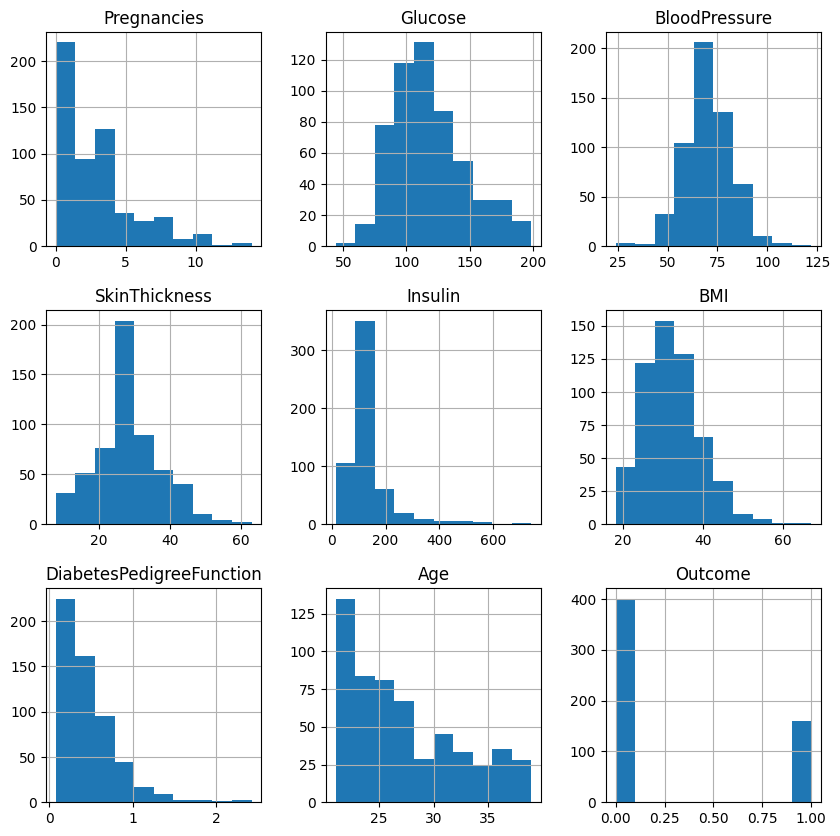

In [ ]:
## Replacing all Missing values with median values for each variable


#Replacing NaN values with median values for each column 
diabetes_df['Glucose'] = diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].median())
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].median())
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median())
diabetes_df['Insulin'] = diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median())
diabetes_df['BMI'] = diabetes_df['BMI'].fillna(diabetes_df['BMI'].median())
diabetes_df

# Display the updated DataFrame
diabetes_df
p =diabetes_df.hist(figsize=(10,10))
diabetes_df.describe()


In [ ]:
## Handling Outliers

#Checking for outliers in the dataset
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)

IQR = Q3 - Q1


outliers = ((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR)))
# Displaying the number of outliers in each column

print(outliers.sum())

#Replacing outliers with median values
diabetes_df = diabetes_df.mask(outliers, diabetes_df.median(), axis=1)




Pregnancies                  25
Glucose                      12
BloodPressure                 7
SkinThickness                23
Insulin                     173
BMI                           7
DiabetesPedigreeFunction     23
Age                           0
Outcome                       0
dtype: int64


In [ ]:
## Displaying the updated DataFrame


diabetes_df.describe()

#Displaying the value counts for the 'Outcome' column

print(diabetes_df['Outcome'].value_counts())
summary = diabetes_df.describe()
summary = summary.round(2)  # Round values to 2 decimal places
summary.to_csv('summary_table.csv')
summary

Outcome
0.0    401
1.0    160
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,561.00,561.00,561.00,561.00,561.00,561.00,561.00,561.00,561.00
mean,2.46,116.22,70.16,27.91,113.51,31.90,0.43,27.19,0.29
std,2.08,26.75,10.88,7.69,13.37,6.51,0.24,5.21,0.45
min,0.00,44.00,38.00,10.00,71.00,18.20,0.08,21.00,0.00
25%,1.00,97.00,64.00,23.00,115.00,27.20,0.25,23.00,0.00
50%,2.00,113.00,70.00,29.00,115.00,31.60,0.38,26.00,0.00
75%,4.00,130.00,76.00,32.00,115.00,35.90,0.56,31.00,1.00
max,8.00,187.00,100.00,45.00,160.00,50.00,1.17,39.00,1.00


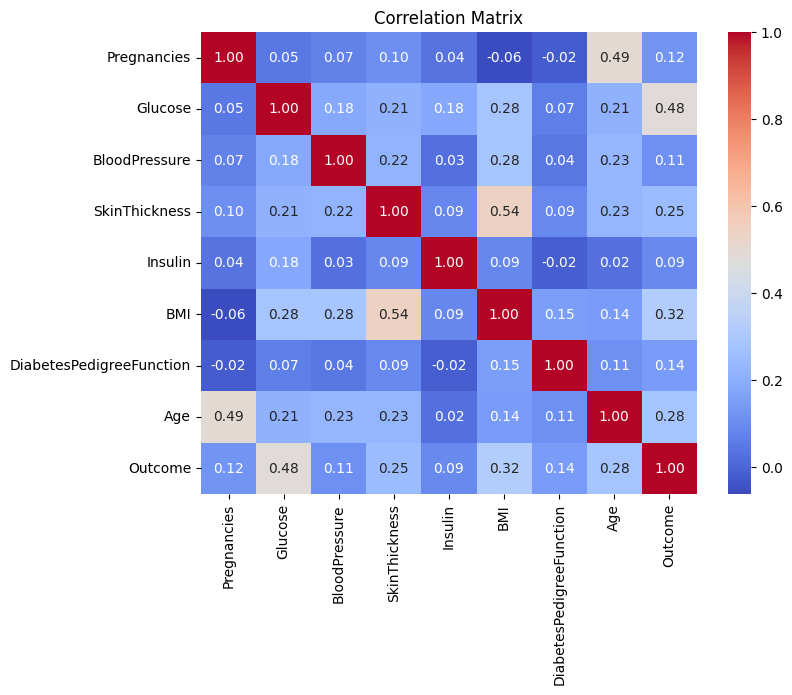

In [ ]:

##Developing a Correlation Matrix

matrix = diabetes_df.corr()



# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

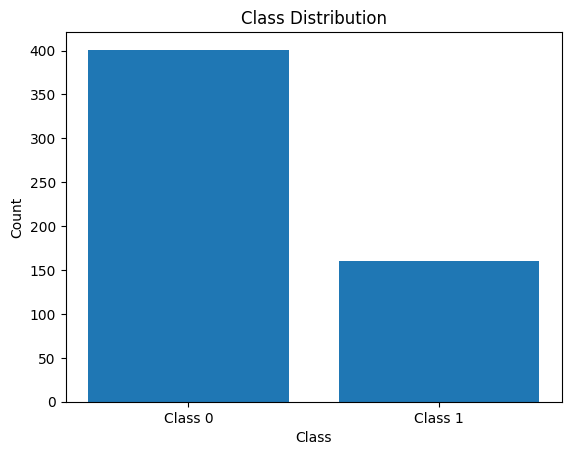

In [ ]:
### Displaying the Class Distribution

x=diabetes_df.drop(["Outcome"],axis=1)
y=diabetes_df["Outcome"]

count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

In [ ]:
## Applying SMOTE to balance the dataset

smote=SMOTE(sampling_strategy='minority') 
x_resampled,y_resampled=smote.fit_resample(x,y)


diabetes_df_resampled = pd.DataFrame(x_resampled, columns=x.columns)
diabetes_df_resampled['Outcome'] = y_resampled

diabetes_df_resampled['Outcome'].value_counts()

diabetes_df_resampled
diabetes_df_resampled.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2.544806,122.546487,71.162393,28.843728,114.190958,32.859675,0.441706,27.635910,0.500000
std,2.044908,28.439273,10.324942,7.297625,12.237441,6.260213,0.226556,5.025489,0.500312
min,0.000000,44.000000,38.000000,10.000000,71.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,26.000000,115.000000,28.700000,0.261000,23.000000,0.000000
50%,2.000000,117.143371,70.000000,29.000000,115.000000,32.500000,0.385560,27.000000,0.500000
75%,4.000000,140.338332,78.000000,32.312645,115.000000,36.688675,0.591000,31.000000,1.000000
max,8.000000,187.000000,100.000000,45.000000,160.000000,50.000000,1.174000,39.000000,1.000000


In [39]:

# Save the cleaned dataset to a new CSV file
diabetes_df_resampled.to_csv('diabetes_cleaned.csv', index=False)
diabetes_df_resampled.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2.544806,122.546487,71.162393,28.843728,114.190958,32.859675,0.441706,27.635910,0.500000
std,2.044908,28.439273,10.324942,7.297625,12.237441,6.260213,0.226556,5.025489,0.500312
min,0.000000,44.000000,38.000000,10.000000,71.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,26.000000,115.000000,28.700000,0.261000,23.000000,0.000000
50%,2.000000,117.143371,70.000000,29.000000,115.000000,32.500000,0.385560,27.000000,0.500000
75%,4.000000,140.338332,78.000000,32.312645,115.000000,36.688675,0.591000,31.000000,1.000000
max,8.000000,187.000000,100.000000,45.000000,160.000000,50.000000,1.174000,39.000000,1.000000


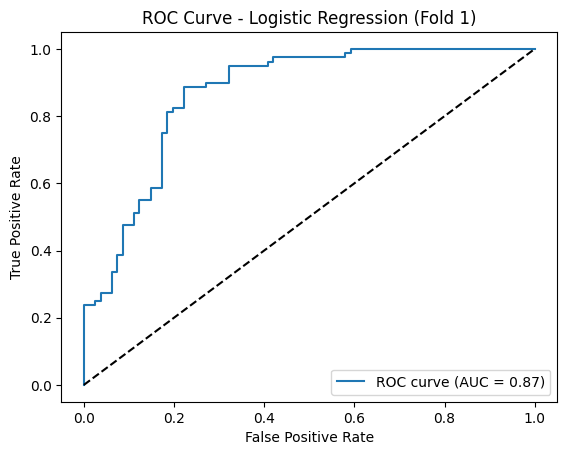

Average Accuracy: 0.7580 ± 0.0455
Average Precision: 0.7590 ± 0.0458
Average Recall: 0.7580 ± 0.0455
Average F1-Score: 0.7578 ± 0.0454
Average AUC: 0.8373 ± 0.0272

Summed Confusion Matrix across folds:
[[308  93]
 [101 300]]


In [ ]:

#Applying Default Logistic Regression with 5-Fold Stratified Cross-Validation

x = diabetes_df_resampled.drop('Outcome', axis=1)
y = diabetes_df_resampled['Outcome']

# Z-score normalization
x = (x - x.mean()) / x.std()

# Lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
conf_matrix_list = []

# 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_idx, test_idx) in enumerate(skf.split(x, y), 1):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    # Pipeline for scaling + logistic regression
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
    ])
    pipeline.fit(x_train, y_train)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)

    accuracy_list.append(accuracy)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    auc_list.append(auc)
    conf_matrix_list.append(confusion_matrix(y_test, y_pred))

    # Plot ROC curve for first fold
    if fold_idx == 1:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - Logistic Regression (Fold 1)')
        plt.legend(loc='lower right')
        plt.show()

# Average and std metrics
avg_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)

avg_precision = np.mean(precision_list)
std_precision = np.std(precision_list)

avg_recall = np.mean(recall_list)
std_recall = np.std(recall_list)

avg_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

avg_auc = np.mean(auc_list)
std_auc = np.std(auc_list)

# Sum confusion matrices across folds
sum_conf_matrix = np.sum(conf_matrix_list, axis=0)
rounded_conf_matrix = np.round(sum_conf_matrix).astype(int)

# Print results
print(f'Average Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f} ± {std_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f} ± {std_recall:.4f}')
print(f'Average F1-Score: {avg_f1:.4f} ± {std_f1:.4f}')
print(f'Average AUC: {avg_auc:.4f} ± {std_auc:.4f}')
print('\nSummed Confusion Matrix across folds:')
print(rounded_conf_matrix)


In [ ]:
# Hyperparameter Tuning with GridSearchCV for Logistic Regression


# Pipeline for scaling + logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))
])

# Hyperparameter grid
param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Prepare features and target
x = diabetes_df_resampled.drop('Outcome', axis=1)
y = diabetes_df_resampled['Outcome']

# Fit to your full dataset
grid_search.fit(x, y)

# Best hyperparameters and score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best CV Accuracy:', grid_search.best_score_)

# Display all hyperparameter performances
results_df = pd.DataFrame(grid_search.cv_results_)
display(results_df[['param_clf__C', 'param_clf__penalty', 'mean_test_score', 'std_test_score']])


Best Hyperparameters: {'clf__C': 0.01, 'clf__penalty': 'l2'}
Best CV Accuracy: 0.75069099378882


,param_clf__C,param_clf__penalty,mean_test_score,std_test_score
0,0.001,l1,0.500000,0.001964
1,0.001,l2,0.748183,0.028139
2,0.010,l1,0.692011,0.010383
3,0.010,l2,0.750691,0.030505
4,0.100,l1,0.749402,0.022535
5,0.100,l2,0.750668,0.024508
6,1.000,l1,0.750668,0.025748
7,1.000,l2,0.750683,0.030313
8,10.000,l1,0.749433,0.030700
9,10.000,l2,0.749433,0.030700


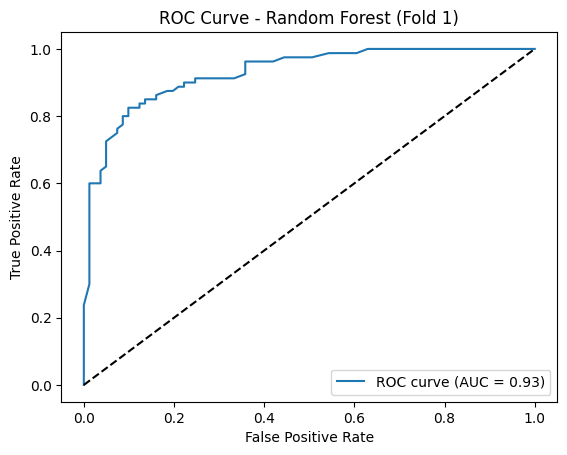

Average Accuracy: 0.8379 ± 0.0133
Average Precision: 0.8403 ± 0.0128
Average Recall: 0.8379 ± 0.0133
Average F1-Score: 0.8376 ± 0.0134
Average AUC: 0.9203 ± 0.0066

Summed Confusion Matrix across folds:
[[324  77]
 [ 53 348]]


In [ ]:
# Random Forest Classifier with 5-Fold Stratified Cross-Validation


x = diabetes_df_resampled.drop('Outcome', axis=1)
y = diabetes_df_resampled['Outcome']



# Initialize metric lists
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
conf_matrix_list = []

# Setup 5-fold stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_idx, test_idx) in enumerate(skf.split(x, y), 1):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)
    y_proba = rf.predict_proba(x_test)[:, 1]

    # Pipeline for scaling + random forest
    pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
    ])
    pipeline.fit(x_train, y_train)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)

    accuracy_list.append(accuracy)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    auc_list.append(auc)
    conf_matrix_list.append(confusion_matrix(y_test, y_pred))

    # Plot ROC curve for first fold
    if fold_idx == 1:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - Random Forest (Fold 1)')
        plt.legend(loc='lower right')
        plt.show()

# Calculate average and std of metrics
avg_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)

avg_precision = np.mean(precision_list)
std_precision = np.std(precision_list)

avg_recall = np.mean(recall_list)
std_recall = np.std(recall_list)

avg_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

avg_auc = np.mean(auc_list)
std_auc = np.std(auc_list)

# Sum confusion matrices
sum_conf_matrix = np.sum(conf_matrix_list, axis=0)
rounded_conf_matrix = np.round(sum_conf_matrix).astype(int)

# Print results
print(f'Average Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f} ± {std_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f} ± {std_recall:.4f}')
print(f'Average F1-Score: {avg_f1:.4f} ± {std_f1:.4f}')
print(f'Average AUC: {avg_auc:.4f} ± {std_auc:.4f}')
print('\nSummed Confusion Matrix across folds:')
print(rounded_conf_matrix)


In [ ]:
# Hyperparameter Tuning with GridSearchCV for Random Forest Classifier

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(x, y)

print('Best Hyperparameters (Random Forest):', grid_search_rf.best_params_)
print('Best CV Accuracy (Random Forest):', grid_search_rf.best_score_)

results_rf_df = pd.DataFrame(grid_search_rf.cv_results_)
display(results_rf_df[['param_clf__n_estimators', 'param_clf__max_depth', 'param_clf__min_samples_split', 'mean_test_score', 'std_test_score']])


Best Hyperparameters (Random Forest): {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Best CV Accuracy (Random Forest): 0.8442934782608695


,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_split,mean_test_score,std_test_score
0,50,None,2,0.843028,0.046040
1,100,None,2,0.839293,0.047832
2,200,None,2,0.843020,0.043651
3,50,None,5,0.843059,0.056672
4,100,None,5,0.840590,0.063832
5,200,None,5,0.838059,0.051318
6,50,5,2,0.805590,0.042795
7,100,5,2,0.814317,0.046164
8,200,5,2,0.813043,0.035978
9,50,5,5,0.814332,0.045897


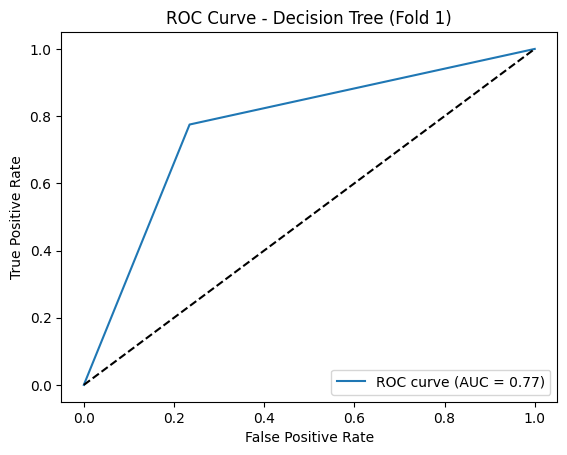

Average Accuracy: 0.7856 ± 0.0311
Average Precision: 0.7863 ± 0.0306
Average Recall: 0.7856 ± 0.0311
Average F1-Score: 0.7854 ± 0.0313
Average AUC: 0.7855 ± 0.0311

Summed Confusion Matrix across folds:
[[306  95]
 [ 77 324]]


In [ ]:
## Applying Decision Tree Classifier with 5-Fold Stratified Cross-Validation


x = diabetes_df_resampled.drop('Outcome', axis=1)
y = diabetes_df_resampled['Outcome']

# Z-score normalization
x = (x - x.mean()) / x.std()

# Initialize metrics storage
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
conf_matrix_list = []

# Setup 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    # Pipeline for scaling + decision tree
    pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
    ])
    pipeline.fit(x_train, y_train)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)
    
    accuracy_list.append(accuracy)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    auc_list.append(auc)
    conf_matrix_list.append(confusion_matrix(y_test, y_pred))
    
    # Plot ROC for first fold only
    if fold_idx == 1:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - Decision Tree (Fold 1)')
        plt.legend(loc='lower right')
        plt.show()

# Calculate mean and std of metrics
avg_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)

avg_precision = np.mean(precision_list)
std_precision = np.std(precision_list)

avg_recall = np.mean(recall_list)
std_recall = np.std(recall_list)

avg_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

avg_auc = np.mean(auc_list)
std_auc = np.std(auc_list)

# Sum confusion matrices and then round for display
sum_conf_matrix = np.sum(conf_matrix_list, axis=0)
rounded_conf_matrix = np.round(sum_conf_matrix).astype(int)

# Print averaged results
print(f'Average Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f} ± {std_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f} ± {std_recall:.4f}')
print(f'Average F1-Score: {avg_f1:.4f} ± {std_f1:.4f}')
print(f'Average AUC: {avg_auc:.4f} ± {std_auc:.4f}')
print('\nSummed Confusion Matrix across folds:')
print(rounded_conf_matrix)


In [ ]:
# Hyperparameter Tuning with GridSearchCV for Decision Tree Classifier

# Pipeline for Decision Tree (scaler kept for consistency even though it's not necessary)
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'clf__max_depth': [None, 3, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to your dataset
grid_search_dt.fit(x, y)

# Best hyperparameters and best accuracy
print('Best Hyperparameters (Decision Tree):', grid_search_dt.best_params_)
print('Best CV Accuracy (Decision Tree):', grid_search_dt.best_score_)




# Extract and view all results for analysis
results_dt_df = pd.DataFrame(grid_search_dt.cv_results_)
display(results_dt_df[['param_clf__max_depth', 'param_clf__min_samples_split', 'param_clf__min_samples_leaf', 'mean_test_score', 'std_test_score']])


Best Hyperparameters (Decision Tree): {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best CV Accuracy (Decision Tree): 0.7732375776397516


,param_clf__max_depth,param_clf__min_samples_split,param_clf__min_samples_leaf,mean_test_score,std_test_score
0,None,2,1,0.773238,0.059569
1,None,5,1,0.770738,0.055777
2,None,10,1,0.766972,0.047486
3,None,2,2,0.755769,0.060859
4,None,5,2,0.753276,0.061388
...,...,...,...,...,...
40,20,5,2,0.753276,0.061388
41,20,10,2,0.756980,0.049241
42,20,2,4,0.743284,0.049937
43,20,5,4,0.743284,0.049937


In [ ]:
## Evaluating best Hypermater Tuned Logistic Regression Model



Feature: 0, Score: 0.08233
Feature: 1, Score: 0.26422
Feature: 2, Score: 0.09845
Feature: 3, Score: 0.10817
Feature: 4, Score: 0.04540
Feature: 5, Score: 0.17621
Feature: 6, Score: 0.10521
Feature: 7, Score: 0.12001


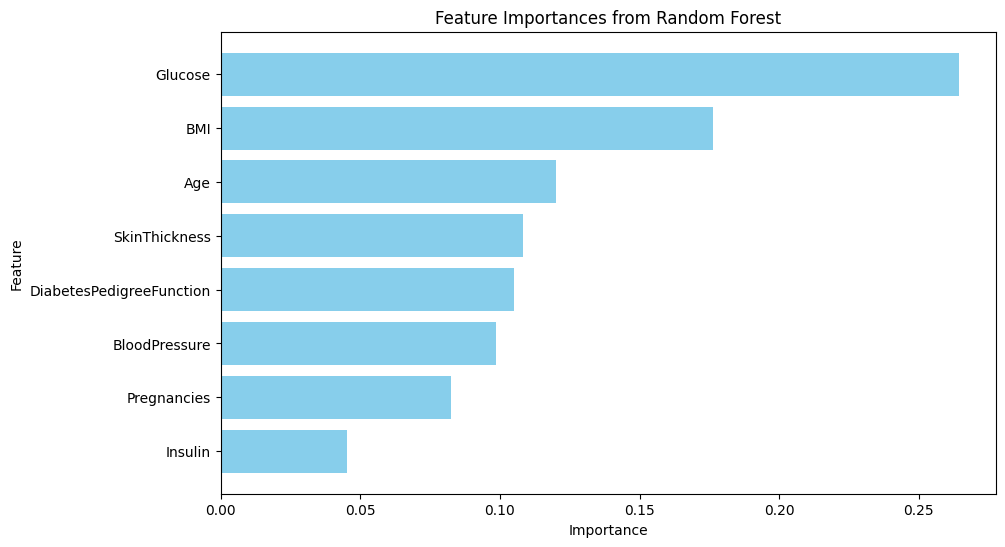

In [ ]:
## Applying Feature Importance from Random Forest Classifier

importance = rf.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
# Create a dictionary to store the results
results = {
    'Algorithm': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, log_reg.predict(x_test)), 
        accuracy_score(y_test, rf.predict(x_test)), 
        accuracy_score(y_test, dt.predict(x_test))
    ],
    'Precision': [
        classification_report(y_test, log_reg.predict(x_test), output_dict=True)['weighted avg']['precision'], 
        classification_report(y_test, rf.predict(x_test), output_dict=True)['weighted avg']['precision'], 
        classification_report(y_test, dt.predict(x_test), output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, log_reg.predict(x_test), output_dict=True)['weighted avg']['recall'], 
        classification_report(y_test, rf.predict(x_test), output_dict=True)['weighted avg']['recall'], 
        classification_report(y_test, dt.predict(x_test), output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, log_reg.predict(x_test), output_dict=True)['weighted avg']['f1-score'], 
        classification_report(y_test, rf.predict(x_test), output_dict=True)['weighted avg']['f1-score'], 
        classification_report(y_test, dt.predict(x_test), output_dict=True)['weighted avg']['f1-score']
    ]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

             Algorithm  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.732919   0.734334  0.732919  0.732919
1        Random Forest  0.857143   0.858255  0.857143  0.856866
2        Decision Tree  0.801242   0.801275  0.801242  0.801135
